<div style="background: linear-gradient(to bottom, #200122, #6f0000); border: 2px; box-radius: 20px"><h1 style="color: white; text-align: center"><br> Hepatitis<br></h1></div>

<p style="font-size: 22px"><b>Aim</b> : To implement Decision Tree with the given dataset of Hepatitis B for Binary Classification </p>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import graphviz
from sklearn import datasets
import seaborn as sns

# Building Feature Set

<p style="font-size: 22px"><b>About Data</b></p>
<p>This dataset contains details about 155 Humans and their condition related to Hepatitis B</p>
<p>Total No of Attributes are : 20 </p>
<p>Details of Attributes are as follows</p>
<ul>
    <li> Class: DIE, LIVE </li>
    <li> AGE: 10, 20, 30, 40, 50, 60, 70, 80 </li>
    <li> SEX: male, female </li>
    <li> STEROID: no, yes</li>
    <li> ANTIVIRALS: no, yes</li>
    <li> FATIGUE: no, yes</li>
    <li> MALAISE: no, yes</li>
    <li> ANOREXIA: no, yes</li>
    <li> LIVER BIG: no, yes</li>
    <li> LIVER FIRM: no, yes</li>
    <li> SPLEEN PALPABLE: no, yes</li>
    <li> SPIDERS: no, yes</li>
    <li> ASCITES: no, yes</li>
    <li> VARICES: no, yes</li>
    <li> BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00</li>
    <li> ALK PHOSPHATE: 33, 80, 120, 160, 200, 250</li>
    <li> SGOT: 13, 100, 200, 300, 400, 500</li>
    <li> ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0</li>
    <li> PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90</li>
    <li>  HISTOLOGY: no, yes</li>
</ul>

<p style="font-size: 22px"><b>Reading Data</b></p>

In [3]:
hep_data = pd.read_csv('./Datasets/hepatitis.data')
hep_data.head(20)

,Class,Age,Sex,Streoid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhospate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


<p style="font-size: 22px"><b>Analyzing Data</b></p>

In [4]:
hep_data.describe(include='all')

,Class,Age,Sex,Streoid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhospate,SGOT,Albumin,Protime,Histology
count,155.000000,155.000000,155.000000,155,155.000000,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155.000000
unique,NaN,NaN,NaN,3,NaN,3,3,3,3,3,3,3,3,3,35,84,85,30,45,NaN
top,NaN,NaN,NaN,2,NaN,1,2,2,2,2,2,2,2,2,1.00,?,20,4.0,?,NaN
freq,NaN,NaN,NaN,78,NaN,100,93,122,120,84,120,99,130,132,29,29,7,25,67,NaN
mean,1.793548,41.200000,1.103226,NaN,1.845161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.451613
std,0.406070,12.565878,0.305240,NaN,0.362923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499266
min,1.000000,7.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2.000000,32.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,2.000000,39.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,2.000000,50.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [5]:
hep_data.describe()

,Class,Age,Sex,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


<p style="font-size: 20px;"> Entries where data is missing </p>

In [6]:
hep_missing = hep_data.loc[(hep_data['Bilirubin']=='?') | (hep_data['AlkPhospate']=='?') | (hep_data['SGOT']=='?') | (hep_data['Albumin']=='?') | (hep_data['Protime']=='?')]

In [7]:
hep_missing.iloc[:, 14:].describe()

,Histology
count,72.000000
mean,1.486111
std,0.503315
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


<p style="font-size: 20px">Data of Persons</p>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000004CEFDA0>],
      dtype=object)

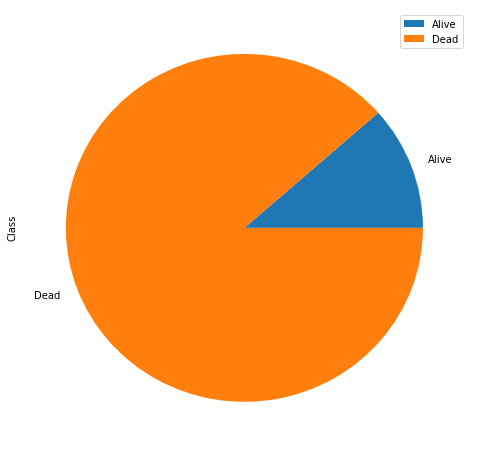

In [8]:
persons= hep_data.iloc[:,:1]
alive= persons.loc[persons['Class']==1]
dead= persons.loc[persons['Class']==2]
plot_data= [alive.sum(), dead.sum()]
plot_data= pd.DataFrame(plot_data)
plot_data.plot(kind='pie', subplots=True, labels=['Alive', 'Dead'],figsize=(8,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B2EF780>],
      dtype=object)

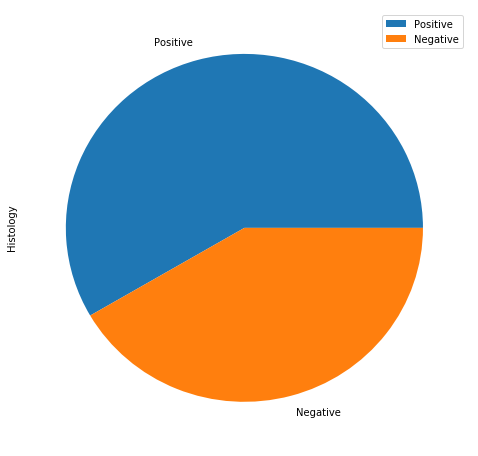

In [31]:
affected = hep_data.iloc[:,19:]
positive = affected.loc[affected['Histology']==2]
negative = affected.loc[affected['Histology']==1]
plot_data= [positive.sum(), negative.sum()]
plot_data= pd.DataFrame(plot_data)
plot_data.plot(kind='pie', subplots=True, labels=['Positive', 'Negative'],figsize=(8,8))

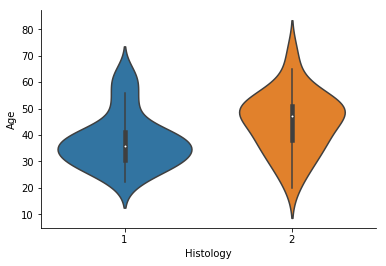

In [39]:
sns.violinplot( hep_data['Histology'], hep_data['Age']) #Variable Plot
sns.despine()

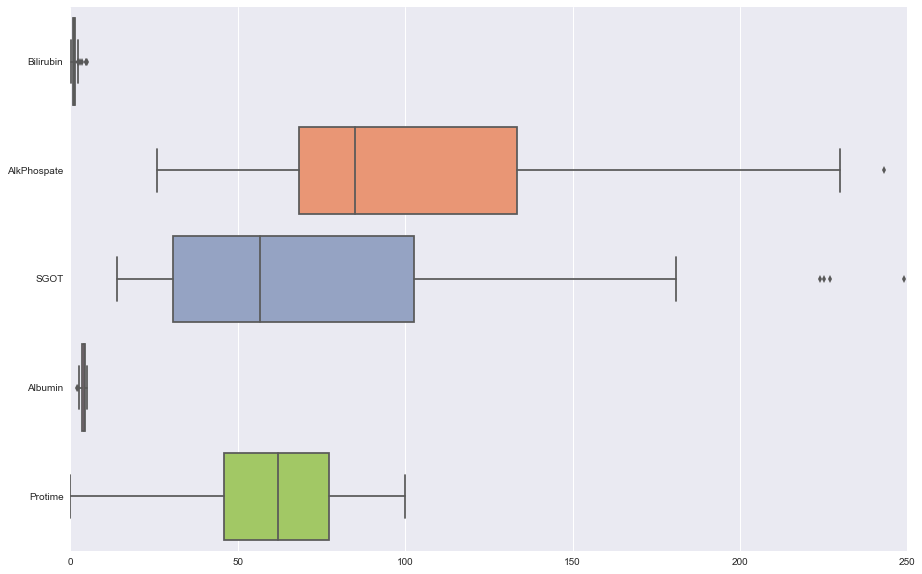

In [69]:
f, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 250))
ax= sns.boxplot(data=hep_data[['Bilirubin','AlkPhospate','SGOT','Albumin','Protime']], orient='h', palette = 'Set2')

<p style="font-size: 20px;"><b>Removing Null values or Missing Data</b></p>

In [9]:
hep_data = hep_data.replace('?', np.NaN)

In [10]:
hep_data= hep_data.dropna()

# Creating Train and Test splits

In [11]:
hep_data.shape

(80, 20)

In [12]:
X= hep_data.iloc[:,:19]
y= hep_data.iloc[:,19:]

In [111]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.58, random_state= 0)

# Training the Model

In [96]:
decision_tree_model= tree.DecisionTreeClassifier(max_depth=3)

In [97]:
decision_tree_model = decision_tree_model.fit(X_train, y_train)

In [98]:
y_pred= decision_tree_model.predict(X_test)

In [99]:
accuracy_score(y_pred, y_test) * 100

70.2127659574468

In [19]:
fname= list(hep_data)
fname=fname[0:19]

In [20]:
cname = list(hep_data)
cname = cname[-1]
cname

'Histology'

<h1 style="color: teal">Decision Tree of max_depth = 3 </h1>

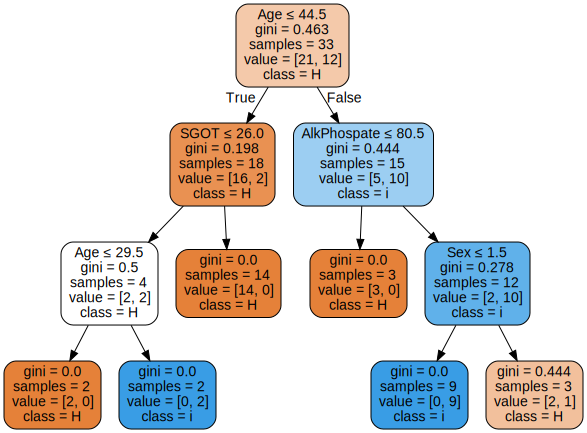

In [21]:
dot_data= tree.export_graphviz(decision_tree_model, out_file=None, feature_names= fname, class_names= cname, filled= True, rounded= True, special_characters= True)
graph= graphviz.Source(dot_data)
graph

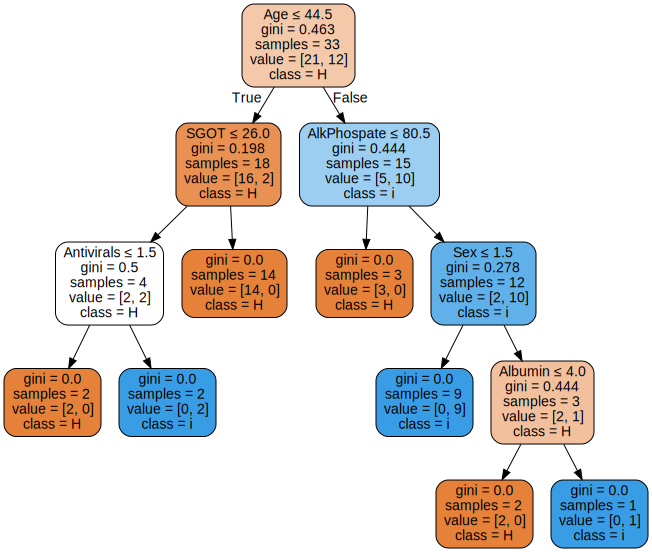

In [112]:
d_tree= tree.DecisionTreeClassifier()
d_tree= d_tree.fit(X_train, y_train)
dot_data= tree.export_graphviz(d_tree, out_file=None, feature_names= fname, class_names= cname, filled= True, rounded= True, special_characters= True)
graph= graphviz.Source(dot_data)
graph

In [113]:
pred_y_= d_tree.predict(X_test)
acc_scr= accuracy_score(pred_y_, y_test)
acc_scr*100

65.95744680851064